<a href="https://colab.research.google.com/github/Taweilo/keyword_exercise/blob/main/Keywords_Automation_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Keywords Automation Process:**<br>
####[√]1. Import keyword data<br>
####[√]2. EDA<br>
####[√]3. Data Wrangling / Modeling<br>
####[√]4. Formating<br>
####[√]5. Download csv<br>

In [1]:
import numpy as np                                        # array, vector, matrix calculations
import pandas as pd                                       # dataFrame handling

In [2]:
import io                                                 # to upload local files
from google.colab import files

In [63]:
# Using google.colab's upload() to load external file data
uploaded = files.upload()

# Get the first file name from the uploaded files
file_name = list(uploaded.keys())[0]

# Read the CSV file using io.BytesIO
df = pd.read_csv(io.BytesIO(uploaded[file_name]), skipinitialspace=True)
df.head()

Saving Keywords (1).csv to Keywords (1) (4).csv


,keywords,bid,views,clicks,conversions,total costs
0,vintage notebook,17,2660,173.0,11.0,2941.0
1,engineering notebook,21,1318,151.0,9.0,3171.0
2,hardcover notebook,19,2110,221.0,30.0,4199.0
3,travelers notebook,19,2576,354.0,26.0,6726.0
4,notebook with pen holder,25,1697,163.0,22.0,4075.0


In [64]:
df.shape

(10000, 6)

In [65]:
df.describe()

,bid,views,clicks,conversions,total costs
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,20.018300,2995.104900,352.194100,31.003200,7108.170400
std,3.714343,1147.100564,182.848717,17.140798,4100.612829
min,12.000000,1000.000000,62.000000,4.000000,1105.000000
25%,17.000000,2017.000000,211.000000,18.000000,4056.000000
50%,21.000000,2970.000000,318.000000,28.000000,6132.000000
75%,23.000000,3986.000000,455.000000,41.000000,9306.000000
max,26.000000,4999.000000,974.000000,102.000000,21428.000000


In [66]:
df['keywords'].unique()

array(['vintage notebook', 'engineering notebook', 'hardcover notebook',
       'travelers notebook', 'notebook with pen holder',
       'college ruled notebook', 'spiral bound notebook',
       'large notebook', 'plain paper', 'personalized notebook',
       'graph paper notebook', 'kids notebook', 'notebook with pockets',
       'recycled paper notebook', 'softcover notebook',
       'leather cover notebook', 'dotted grid notebook', 'art sketchbook',
       'waterproof notebook', 'academic planner notebook'], dtype=object)

In [67]:
# Create a dictionary from "keywords" and "bid" columns
keyword_dict = df.set_index('keywords')['bid'].to_dict()

# Display the dictionary
print(keyword_dict)

{'vintage notebook': 17, 'engineering notebook': 21, 'hardcover notebook': 19, 'travelers notebook': 19, 'notebook with pen holder': 25, 'college ruled notebook': 23, 'spiral bound notebook': 22, 'large notebook': 15, 'plain paper': 12, 'personalized notebook': 22, 'graph paper notebook': 21, 'kids notebook': 14, 'notebook with pockets': 22, 'recycled paper notebook': 24, 'softcover notebook': 19, 'leather cover notebook': 23, 'dotted grid notebook': 21, 'art sketchbook': 15, 'waterproof notebook': 20, 'academic planner notebook': 26}


In [68]:
# Create a pivot table
pivot_table = pd.pivot_table(df, values=['views', 'clicks', 'conversions'], index='keywords', aggfunc='sum', fill_value=0)


# Display the pivot table
print(pivot_table)

                           clicks  conversions    views
keywords                                               
academic planner notebook  139222        12361  1642629
art sketchbook             142945        10142  1466400
college ruled notebook     219181        16445  1485815
dotted grid notebook       104900        15111  1437663
engineering notebook       169161         9906  1475451
graph paper notebook       150445        17992  1454249
hardcover notebook         166039        22325  1584236
kids notebook              185175         9365  1479809
large notebook             150153        10758  1566405
leather cover notebook      90682         8948  1459015
notebook with pen holder   137892        18909  1436896
notebook with pockets      322783        22570  1655693
personalized notebook      250890        31652  1554566
plain paper                165345        18709  1509455
recycled paper notebook    192375        14968  1465409
softcover notebook         125711        13449  

In [69]:
# Add 'bid' column using map
pivot_table['bid'] = pivot_table.index.map(keyword_dict)

# calculate CTR
pivot_table['CTR'] = pivot_table['clicks']/pivot_table['views']

# calculate conversion rate
pivot_table['conversion rate'] = pivot_table['conversions']/pivot_table['clicks']

# add extra col as price
pivot_table['price'] = 300

# calculate revenue
pivot_table['revenue'] = pivot_table['price']*pivot_table['conversions']

# calculate total costs
pivot_table['total costs'] = pivot_table['clicks']*pivot_table['bid']

# calculate profit
pivot_table['profit'] = pivot_table['revenue'] - pivot_table['total costs']

pivot_table

,clicks,conversions,views,bid,CTR,conversion rate,price,revenue,total costs,profit
keywords,,,,,,,,,,
academic planner notebook,139222,12361,1642629,26,0.084756,0.088786,300,3708300,3619772,88528
art sketchbook,142945,10142,1466400,15,0.097480,0.070950,300,3042600,2144175,898425
college ruled notebook,219181,16445,1485815,23,0.147516,0.075029,300,4933500,5041163,-107663
dotted grid notebook,104900,15111,1437663,21,0.072966,0.144051,300,4533300,2202900,2330400
engineering notebook,169161,9906,1475451,21,0.114650,0.058560,300,2971800,3552381,-580581
graph paper notebook,150445,17992,1454249,21,0.103452,0.119592,300,5397600,3159345,2238255
hardcover notebook,166039,22325,1584236,19,0.104807,0.134456,300,6697500,3154741,3542759
kids notebook,185175,9365,1479809,14,0.125134,0.050574,300,2809500,2592450,217050
large notebook,150153,10758,1566405,15,0.095858,0.071647,300,3227400,2252295,975105


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


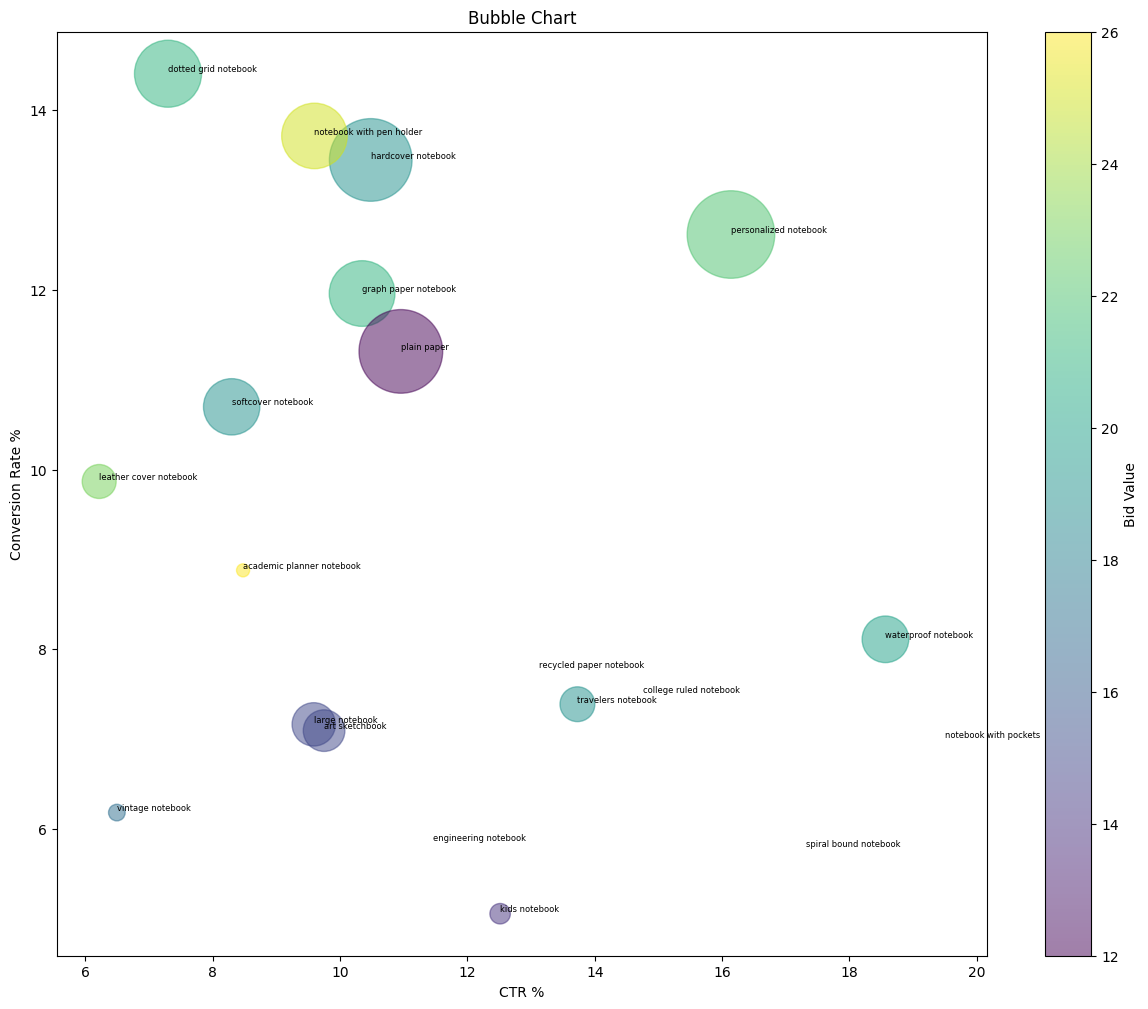

In [70]:
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(15, 12))

# Bubble chart
plt.scatter(pivot_table['CTR']*100, pivot_table['conversion rate']*100, s=pivot_table['profit']/1000, c=pivot_table['bid'], cmap='viridis', alpha=0.5)

# Annotate each point with its corresponding keyword (index)
for keyword, row in pivot_table.iterrows():
    plt.text(row['CTR']*100, row['conversion rate']*100, keyword, fontsize=6, ha='left', va='bottom')

# Add labels and title
plt.xlabel('CTR %')
plt.ylabel('Conversion Rate %')
plt.title('Bubble Chart')

# Add a colorbar to represent the 'bid' values
colorbar = plt.colorbar()
colorbar.set_label('Bid Value')

# Show the plot
plt.show()

In [76]:
col = ['profit', 'CTR',	'conversion rate']
pivot_table_sorted = pivot_table.sort_values(by= col, ascending=False)
pivot_table_sorted = pivot_table_sorted [col]

In [77]:
# filter
# profit >0
pivot_table_filter = pivot_table_sorted[pivot_table_sorted['profit'] > 0]

# CTR > 0.1
pivot_table_filter = pivot_table_filter[pivot_table_filter['CTR'] > 0.1]

# CTR > 0.1
pivot_table_filter = pivot_table_filter[pivot_table_filter['conversion rate'] > 0.05]

pivot_table_filter

,profit,CTR,conversion rate
keywords,,,
personalized notebook,3976020,0.161389,0.126159
plain paper,3628560,0.109540,0.113151
hardcover notebook,3542759,0.104807,0.134456
graph paper notebook,2238255,0.103452,0.119592
waterproof notebook,1127800,0.185655,0.081111
travelers notebook,629326,0.137274,0.073888
kids notebook,217050,0.125134,0.050574


In [84]:
# oraganize and download csv
pivot_table_filter_index = pivot_table_filter.index

# Assuming pivot_table_filter_index is a Pandas Index object
pivot_table_filter_index = pivot_table_filter.index

# Convert the index to a DataFrame
index_df = pd.DataFrame({'index_column_name': pivot_table_filter_index})

# Save the DataFrame to a CSV file
index_df.to_csv('Keywords_selected.csv', header=False, encoding='utf-8-sig', index=False)
files.download('Keywords_selected.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>